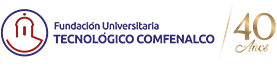

# **PARTE 1 LIMPIEZA**
---

# **LIMPIEZA DE DATOS CON PYTHON**
---

Importamos los paquetes que vamos a usar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import  SimpleImputer

Cargamos los datos

In [ ]:
url = 'https://raw.githubusercontent.com/hmedrano1979/ITC/main/train.csv'
data=pd.read_csv(url)
print("Datos desde la URL cargados con éxito.")

Datos desde la URL cargados con éxito.


Recordemos algunos métodos útiles de los dataframe de pandas

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Para ver una informacion general sobre los atributos del dataframe

Descripción de cada columna:
- Survived : Sobrevivio o no? 0-1
- Pclass : En que clase viajaba
- Name: Nombre del pasajero
- Sex: Es hombre o mujer?
- Age: Edad del pasajero
- SibSp: Número de hermanos/cónyuges a bordo del Titanic
- Parch: Número de padres/hijos a bordo del Titanic
- Ticket: Número de boleto
- Fare: Tarifa del pasajero
- Embarked: Puerto de embarque

Cambiar de nombre de las variables

In [ ]:
data.rename(columns={'Survived': 'Sobrevivio o no?'}, inplace=True)
#Renombrar múltiples columnas:cambiar varios nombres de columnas al mismo tiempo:
#df.rename(columns={'Survived': 'Sobrevivio o no?', 'Pclass': 'En que clase viajaba'}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Sobrevivio o no?  891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Para cambiar el tipo de dato de una columna

In [ ]:
data['Pclass']=data['Pclass'].astype(str)
data.info()

In [ ]:
data['Pclass']=data['Pclass'].astype(int)

Para obtener una descrpcion estadistica de las columnas numericas

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Para obtener una descripcion de las categoricas

In [ ]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Para ver el tamaño del dataset

In [ ]:
data.shape

(891, 12)

## **COMPROBACION DE OUTLIERS**

De forma visual

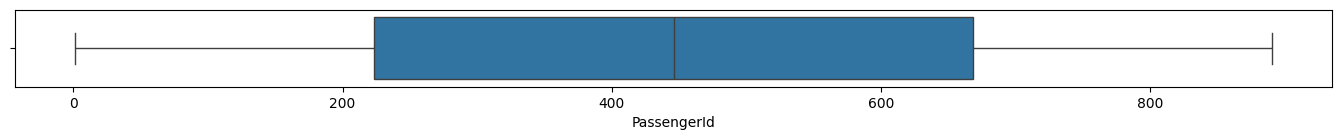

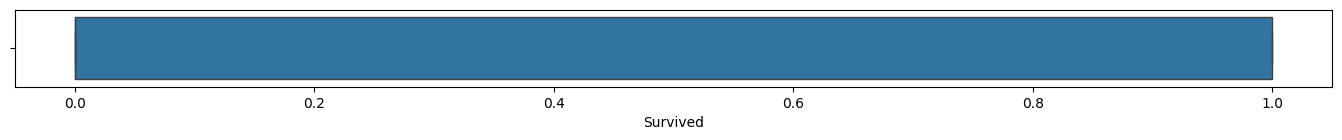

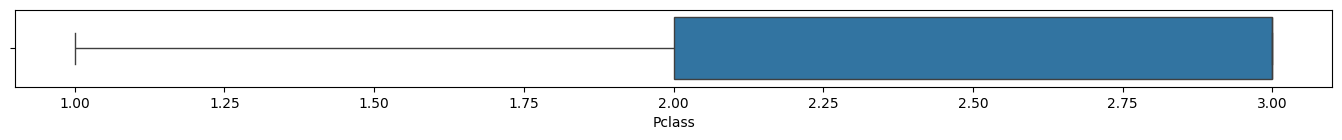

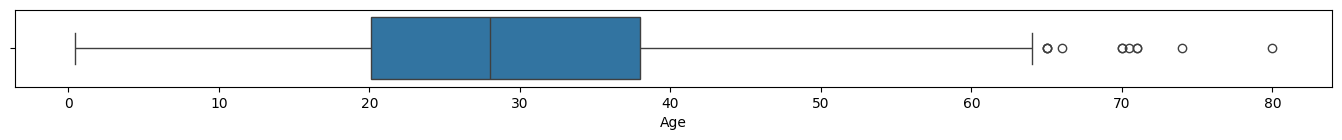

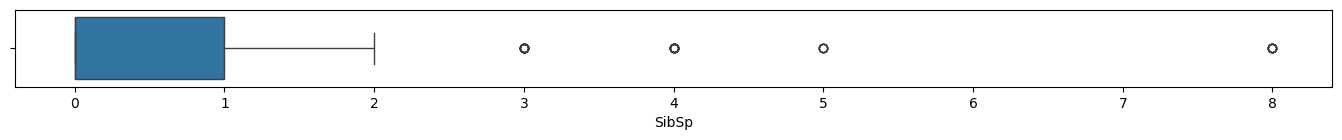

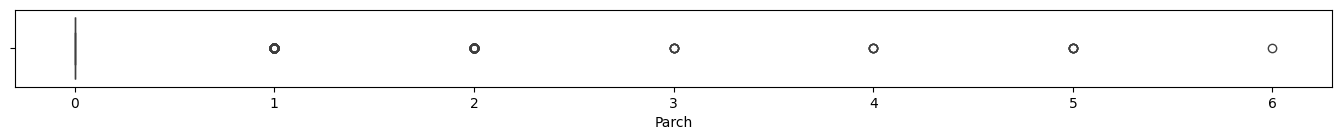

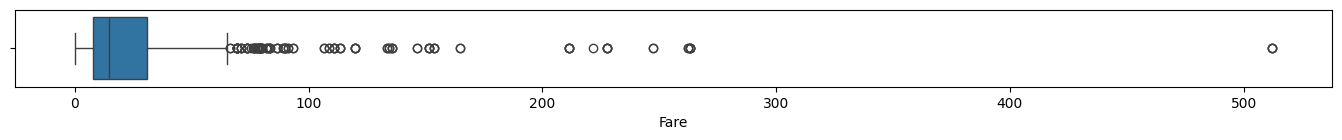

In [ ]:
num_cols=data.select_dtypes(include='number').columns

for col in num_cols:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=data[num_cols], x=col)

Numericamente

In [ ]:
#Nº de Outliers usando rango IQR
num_cols=data.select_dtypes(include='number').columns
outliers={}

for col in num_cols:
  Q1 = np.percentile(data[col], 25)
  Q3 = np.percentile(data[col], 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers[col]= (data[col] > upper_bound).sum() + (data[col]< lower_bound).sum()

print(outliers)

{'PassengerId': 0, 'Sobrevivio o no?': 0, 'Pclass': 0, 'Age': 0, 'SibSp': 46, 'Parch': 213, 'Fare': 116}


In [ ]:
#Nº de Outliers usando 3 std
outliers={}
for col in num_cols:
  mean=data[col].mean()
  std=data[col].std()

  outliers[col] = (data[col] > (mean + 3 *std)).sum() + (data[col] < (mean - 3 *std)).sum()

print(outliers)

{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Age': 2, 'SibSp': 30, 'Parch': 15, 'Fare': 20}


<Axes: xlabel='Age', ylabel='Count'>

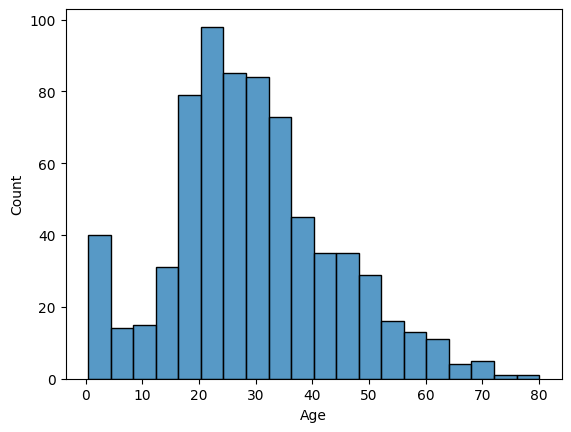

In [ ]:
import seaborn as sns
sns.histplot(data['Age'])

Veamos ahora los diferentes metodos de trabajar con nulos

In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Veamos ahora los diferentes metodos de trabajar con nulos en porcentajes %

In [ ]:
data.isna().sum() / len(data)

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


Eliminando los nulos

In [ ]:
data.drop('Cabin',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Sobrevivio o no?  891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Embarked          889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Imputando valores

<Axes: xlabel='Age', ylabel='Count'>

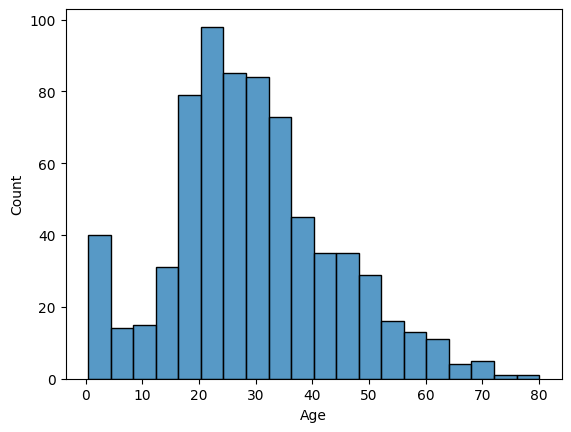

In [ ]:
sns.histplot(data['Age'])